In [1]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



%load_ext autoreload
%autoreload 2

# Load generated graphs

In [2]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    data_in = cs.load_data("../Generated_graphs/ETNgen-"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_tag_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/TagGen/"+file_name+"_generato_TagGen.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in


In [3]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

# load topology results

In [44]:
def load_topo_res_SI(file_name):
    res_etn = np.load("topology_results/SI/"+file_name+"_etn_tag.npy")
    return res_etn
def flip_data(x1,x2,idx = [2, 5, 1, 8, 9, 6, 4, 3, 0, 7]):
    x1 = x1[idx]
    x2 = x2[idx]
    
    return x1,x2

def default_prop(ax):
    ax[0].set_yticklabels(labels)
    ax[0].set_yticks(x)
    ax[0].set_xlim(0,1)

    ax[1].set_yticks(x)
    ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)
    ax[1].set_xlim(0,1)

    ax[2].set_yticks(x)
    ax[2].set_xlim(0,1)
    ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)

    ax[2].set_xticks([0,0.33,0.66,1])
    ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
    ax[1].set_xticks([0,0.33,0.66,1])
    ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
    ax[0].set_xticks([0,0.33,0.66,1])
    ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])


    ax[0].tick_params(bottom=True, right=False,left=False)
    ax[0].set_axisbelow(True)
    ax[0].xaxis.grid(True, color='#b3b3b3')
    ax[0].yaxis.grid(False)

    ax[1].tick_params(bottom=True, right=False,left=False)
    ax[1].set_axisbelow(True)
    ax[1].xaxis.grid(True, color='#b3b3b3')
    ax[1].yaxis.grid(False)

    ax[2].tick_params(bottom=True, right=False,left=False)
    ax[2].set_axisbelow(True)
    ax[2].xaxis.grid(True, color='#b3b3b3')
    ax[2].yaxis.grid(False)



    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)



    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)


    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)
    ax[2].spines['left'].set_visible(False)
    ax[2].spines['bottom'].set_visible(False)

In [45]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [46]:
idx =[2, 5, 1, 8, 9, 6, 4, 3, 0, 7]
tmp= ["Density",
      "Global clustering \ncoefficient",
      "Average shortest\npath length",
      "Interacting\nindividuals",
      "New conversations",
      "Assortativity",
      "S-metric",        
      "Number of interactions",
      "Edge strength",
      "Duration of contacts"]


tmp = np.array(tmp)
labels = tmp[idx]

# face to face

<ipython-input-44-30d19b89a07c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(labels)


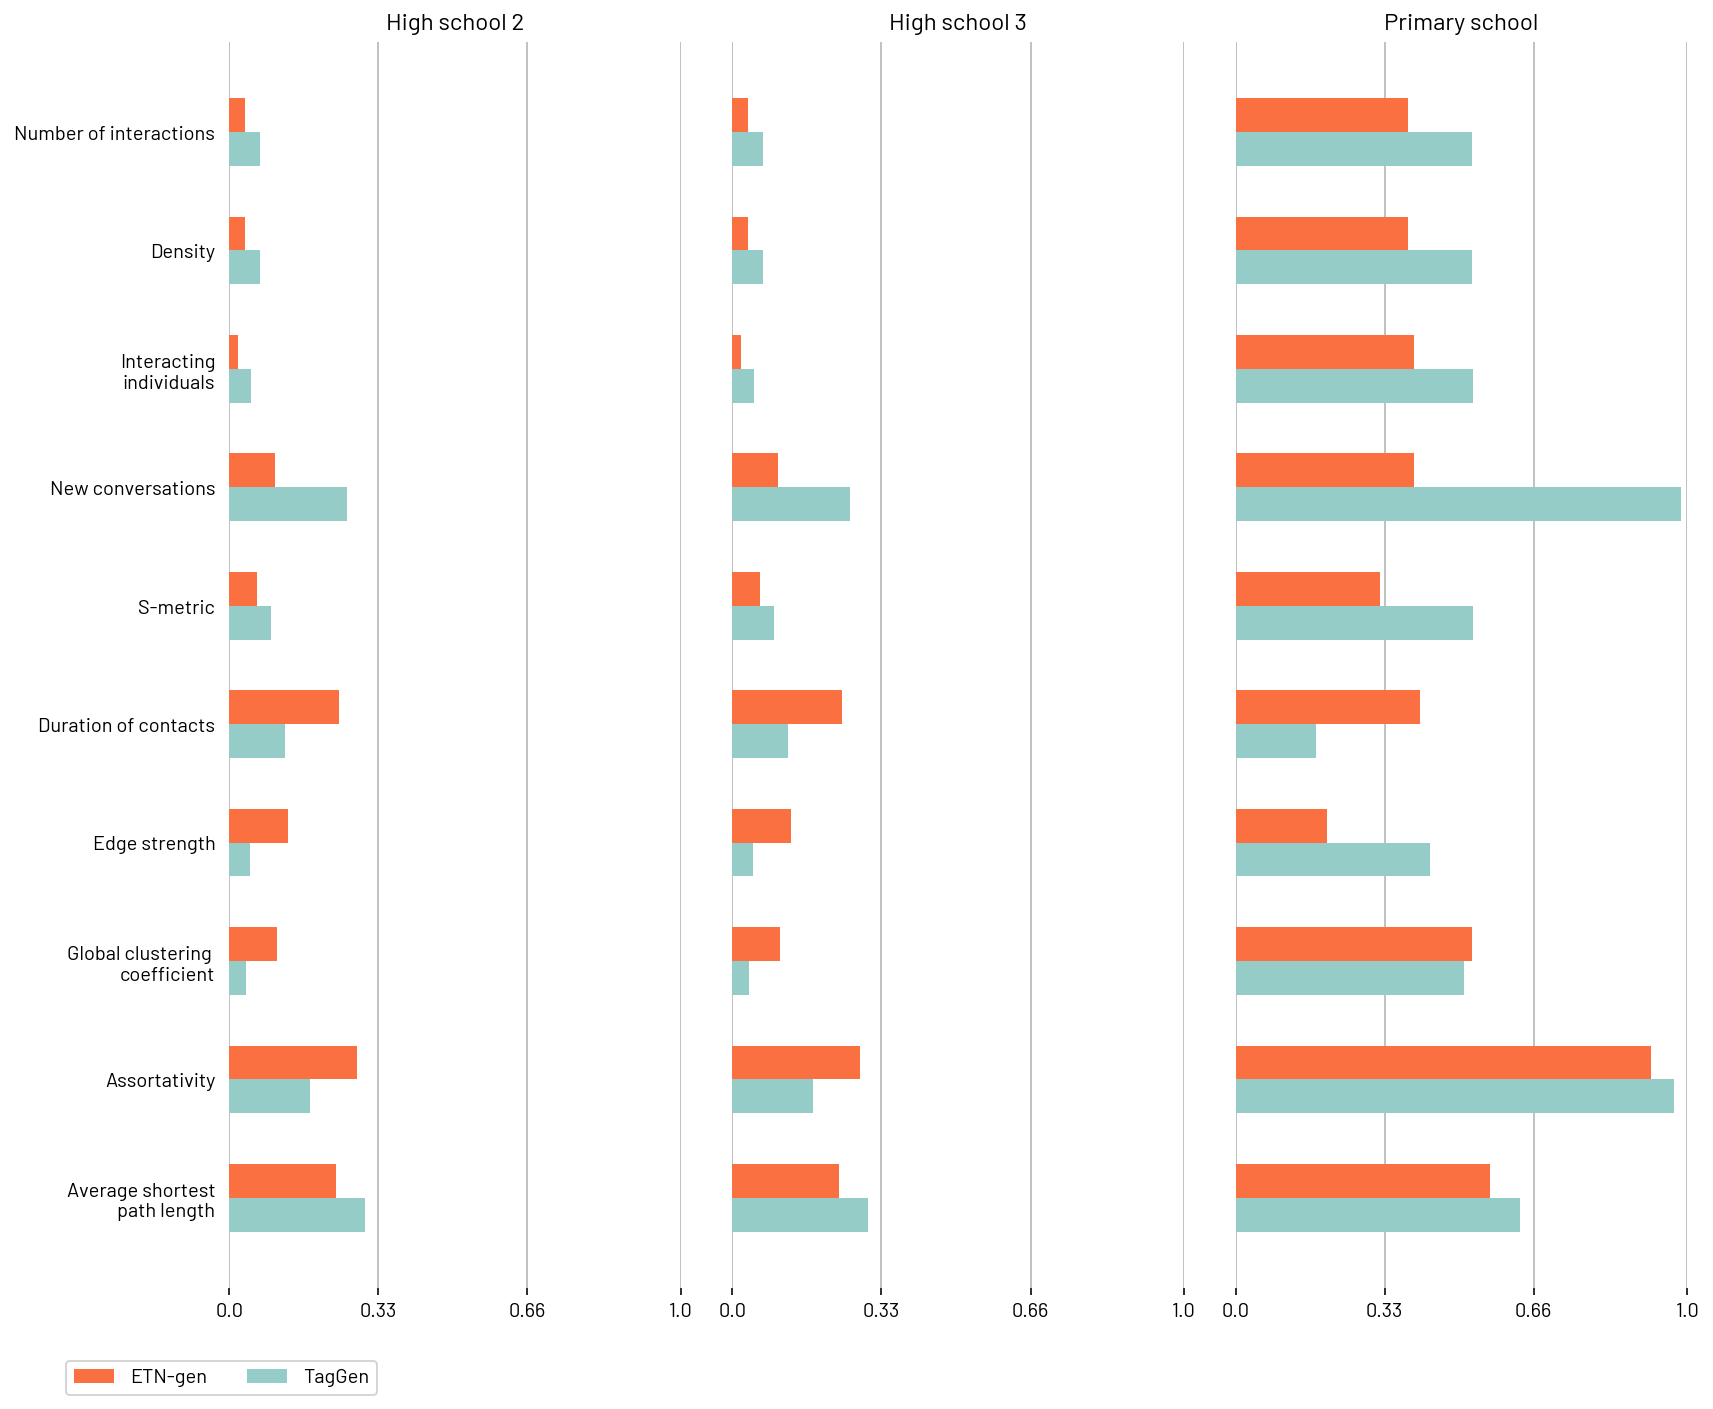

In [71]:
x = np.arange(len(x1))*0.7  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(1,3,figsize=(12,10))
fig.tight_layout(pad=-4)


x1,x2 = load_topo_res_SI("High_School12")
x1,x2 = flip_data(x1,x2)
ax[0].title.set_text("High school 2")

error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)


rects1 = ax[0].barh(x + 0.1, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[0].barh(x - 0.1, x2, width, label='TagGen',color=TAG_COLOR)



x1,x2 = load_topo_res_SI("High_School12")
x1,x2 = flip_data(x1,x2)
ax[1].title.set_text("High school 3")

rects1 = ax[1].barh(x + 0.1, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[1].barh(x - 0.1, x2, width, label='TagGen',color=TAG_COLOR)



x1,x2 = load_topo_res_SI("primary_school")
x1,x2 = flip_data(x1,x2)
ax[2].title.set_text("Primary school")


rects1 = ax[2].barh(x + 0.1, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[2].barh(x - 0.1, x2, width, label='TagGen',color=TAG_COLOR)

default_prop(ax)

ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(0.35, -0.05))


fig.tight_layout()
plt.savefig("topolgy_SI_face.pdf", bbox_inches = 'tight')
plt.show()


# calls sms

In [57]:

def default_prop_2(ax):
    ax[0].set_yticklabels(labels)
    ax[0].set_yticks(x)
    ax[0].set_xlim(0,1)

    ax[1].set_yticks(x)
    ax[1].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)
    ax[1].set_xlim(0,1)

    ax[2].set_yticks(x)
    ax[2].set_xlim(0,1)
    ax[2].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)
    
    
    ax[3].set_yticks(x)
    ax[3].set_xlim(0,1)
    ax[3].set_yticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=0)
    

    ax[2].set_xticks([0,0.33,0.66,1])
    ax[2].set_xticklabels(["0.0","0.33","0.66","1.0"])
    ax[1].set_xticks([0,0.33,0.66,1])
    ax[1].set_xticklabels(["0.0","0.33","0.66","1.0"])
    ax[0].set_xticks([0,0.33,0.66,1])
    ax[0].set_xticklabels(["0.0","0.33","0.66","1.0"])
    ax[3].set_xticks([0,0.33,0.66,1])
    ax[3].set_xticklabels(["0.0","0.33","0.66","1.0"])


    ax[0].tick_params(bottom=True, right=False,left=False)
    ax[0].set_axisbelow(True)
    ax[0].xaxis.grid(True, color='#b3b3b3')
    ax[0].yaxis.grid(False)

    ax[1].tick_params(bottom=True, right=False,left=False)
    ax[1].set_axisbelow(True)
    ax[1].xaxis.grid(True, color='#b3b3b3')
    ax[1].yaxis.grid(False)

    ax[2].tick_params(bottom=True, right=False,left=False)
    ax[2].set_axisbelow(True)
    ax[2].xaxis.grid(True, color='#b3b3b3')
    ax[2].yaxis.grid(False)

    ax[3].tick_params(bottom=True, right=False,left=False)
    ax[3].set_axisbelow(True)
    ax[3].xaxis.grid(True, color='#b3b3b3')
    ax[3].yaxis.grid(False)



    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)



    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)


    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)
    ax[2].spines['left'].set_visible(False)
    ax[2].spines['bottom'].set_visible(False)

    ax[3].spines['top'].set_visible(False)
    ax[3].spines['right'].set_visible(False)
    ax[3].spines['left'].set_visible(False)
    ax[3].spines['bottom'].set_visible(False)

<ipython-input-57-b63e774f85c0>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(labels)


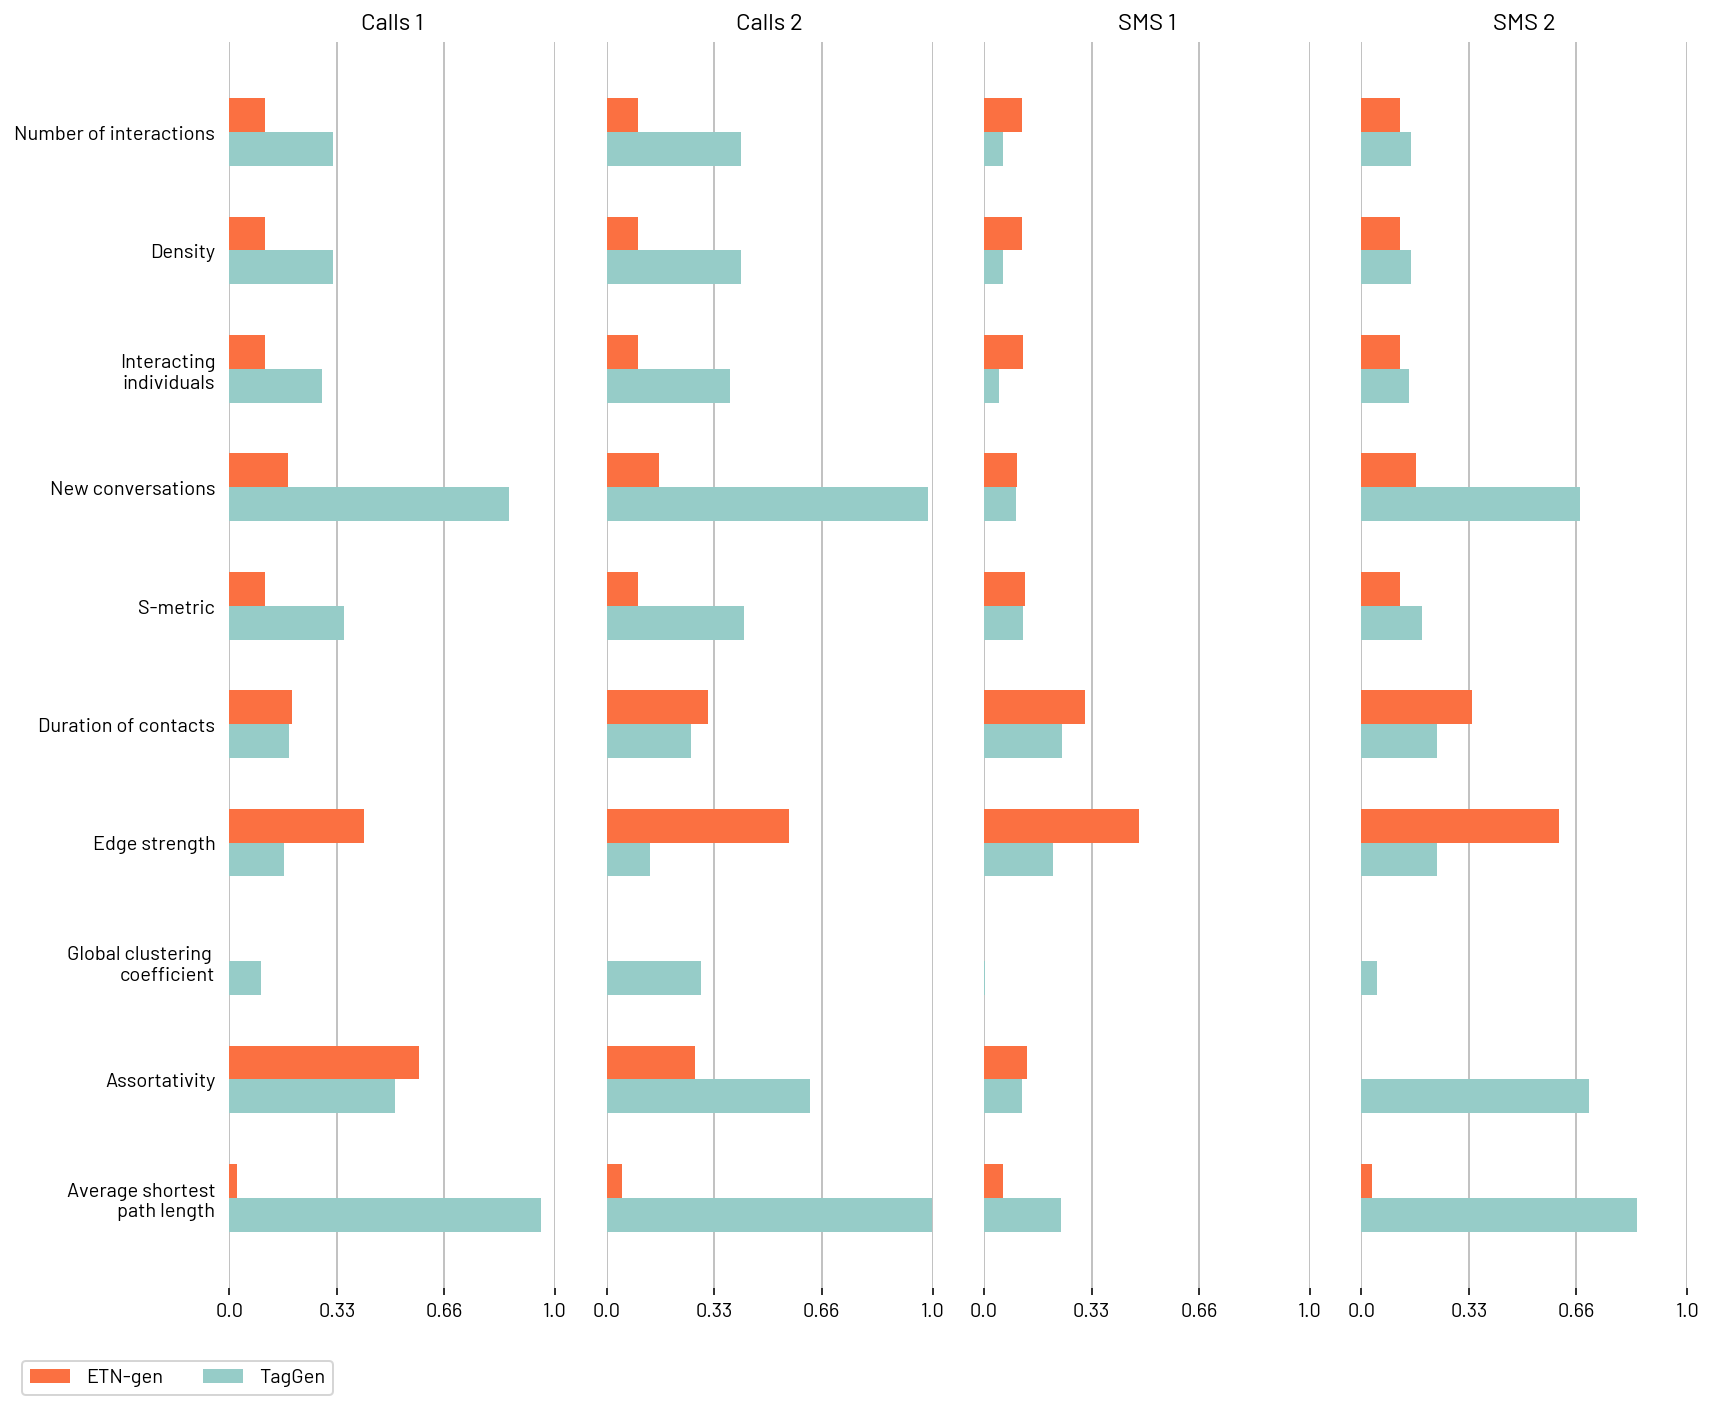

In [72]:
x = np.arange(len(x1))*0.7  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(1,4,figsize=(12,10))
fig.tight_layout(pad=-4)


x1,x2 = load_topo_res_SI("DTU_calls_1sett_599")
x1,x2 = flip_data(x1,x2)
ax[0].title.set_text("Calls 1")

error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=3, capthick=1)


rects1 = ax[0].barh(x + 0.1, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[0].barh(x - 0.1, x2, width, label='TagGen',color=TAG_COLOR)



x1,x2 = load_topo_res_SI("FF_calls_1sett_599")
x1,x2 = flip_data(x1,x2)
ax[1].title.set_text("Calls 2")

rects1 = ax[1].barh(x + 0.1, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[1].barh(x - 0.1, x2, width, label='TagGen',color=TAG_COLOR)



x1,x2 = load_topo_res_SI("DTU_SMS_1sett_599")
x1,x2 = flip_data(x1,x2)
ax[2].title.set_text("SMS 1")


rects1 = ax[2].barh(x + 0.1, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[2].barh(x - 0.1, x2, width, label='TagGen',color=TAG_COLOR)



x1,x2 = load_topo_res_SI("FF_SMS_1sett_599")
x1,x2 = flip_data(x1,x2)
ax[3].title.set_text("SMS 2")


rects1 = ax[3].barh(x + 0.1, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[3].barh(x - 0.1, x2, width, label='TagGen',color=TAG_COLOR)


default_prop_2(ax)

ax[0].legend(loc='upper right',ncol = 5,bbox_to_anchor=(0.35, -0.05))
fig.tight_layout()
plt.savefig("topolgy_SI_calls_sms.pdf", bbox_inches = 'tight')
plt.show()
